In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
songsPath = "data/Most_Streamed_Spotify_Songs_2024.csv"
songs = pd.read_csv(songsPath, encoding='ISO-8859-1')
songs.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [3]:
# Check for missing values
songs.isnull().sum()

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Explicit Track      

In [4]:
# See shape of the data
songs.shape

(4600, 29)

In [5]:
# Drop missing values in the Artist column
songs = songs.dropna(subset=['Artist'])
songs.isnull().sum()

Track                            0
Album Name                       0
Artist                           0
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                108
Spotify Playlist Count          65
Spotify Playlist Reach          67
Spotify Popularity             799
YouTube Views                  303
YouTube Likes                  310
TikTok Posts                  1168
TikTok Likes                   975
TikTok Views                   976
YouTube Playlist Reach        1004
Apple Music Playlist Count     556
AirPlay Spins                  493
SiriusXM Spins                2118
Deezer Playlist Count          916
Deezer Playlist Reach          923
Amazon Playlist Count         1050
Pandora Streams               1101
Pandora Track Stations        1263
Soundcloud Streams            3328
Shazam Counts                  576
TIDAL Popularity              4595
Explicit Track      

In [6]:
# Remove duplicates in the data and check the shape
songs = songs.drop_duplicates(subset=['Track', 'Artist'])
songs.shape

(4483, 29)

In [7]:
# Check the data types
songs.dtypes

Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                  object
Track Score                   float64
Spotify Streams                object
Spotify Playlist Count         object
Spotify Playlist Reach         object
Spotify Popularity            float64
YouTube Views                  object
YouTube Likes                  object
TikTok Posts                   object
TikTok Likes                   object
TikTok Views                   object
YouTube Playlist Reach         object
Apple Music Playlist Count    float64
AirPlay Spins                  object
SiriusXM Spins                 object
Deezer Playlist Count         float64
Deezer Playlist Reach          object
Amazon Playlist Count         float64
Pandora Streams                object
Pandora Track Stations         object
Soundcloud Streams             object
Shazam Count

In [8]:
# Convert Explicit Track to a boolean
songs['Explicit Track'] = songs['Explicit Track'].astype(bool)

# Display the data types to verify the conversion
songs.dtypes

Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                  object
Track Score                   float64
Spotify Streams                object
Spotify Playlist Count         object
Spotify Playlist Reach         object
Spotify Popularity            float64
YouTube Views                  object
YouTube Likes                  object
TikTok Posts                   object
TikTok Likes                   object
TikTok Views                   object
YouTube Playlist Reach         object
Apple Music Playlist Count    float64
AirPlay Spins                  object
SiriusXM Spins                 object
Deezer Playlist Count         float64
Deezer Playlist Reach          object
Amazon Playlist Count         float64
Pandora Streams                object
Pandora Track Stations         object
Soundcloud Streams             object
Shazam Count

In [9]:
# Convert the Release Date to a datetime
songs['Release Date'] = pd.to_datetime(songs['Release Date'])

# Display the data types to verify the conversion
songs.dtypes

Track                                 object
Album Name                            object
Artist                                object
Release Date                  datetime64[ns]
ISRC                                  object
All Time Rank                         object
Track Score                          float64
Spotify Streams                       object
Spotify Playlist Count                object
Spotify Playlist Reach                object
Spotify Popularity                   float64
YouTube Views                         object
YouTube Likes                         object
TikTok Posts                          object
TikTok Likes                          object
TikTok Views                          object
YouTube Playlist Reach                object
Apple Music Playlist Count           float64
AirPlay Spins                         object
SiriusXM Spins                        object
Deezer Playlist Count                float64
Deezer Playlist Reach                 object
Amazon Pla

In [10]:
# Remove the TIDAL Popularity column
songs = songs.drop(columns=['TIDAL Popularity'])
songs.head() 




,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",False
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",True
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",False
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",False
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,"12,185",1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",True


In [11]:
# Convert the numerical data to integers
columnsToConvert = ['All Time Rank','Spotify Streams','Spotify Playlist Count','Spotify Playlist Reach','Spotify Popularity',
                    'YouTube Views','YouTube Likes','TikTok Posts','TikTok Likes','TikTok Views','YouTube Playlist Reach',
                    'Apple Music Playlist Count','AirPlay Spins','SiriusXM Spins','Deezer Playlist Count','Deezer Playlist Reach',
                    'Amazon Playlist Count','Pandora Streams','Pandora Track Stations','Soundcloud Streams','Shazam Counts']
songs.dtypes

for column in columnsToConvert:
    songs[column] = songs[column].astype(str).str.replace(',', '').replace('nan', '0').astype(float).astype('Int64')

# Display the data types to verify the conversion
print(songs.dtypes)

Track                                 object
Album Name                            object
Artist                                object
Release Date                  datetime64[ns]
ISRC                                  object
All Time Rank                          Int64
Track Score                          float64
Spotify Streams                        Int64
Spotify Playlist Count                 Int64
Spotify Playlist Reach                 Int64
Spotify Popularity                     Int64
YouTube Views                          Int64
YouTube Likes                          Int64
TikTok Posts                           Int64
TikTok Likes                           Int64
TikTok Views                           Int64
YouTube Playlist Reach                 Int64
Apple Music Playlist Count             Int64
AirPlay Spins                          Int64
SiriusXM Spins                         Int64
Deezer Playlist Count                  Int64
Deezer Playlist Reach                  Int64
Amazon Pla

In [12]:
# Find the top 10 most streamed songs
top10Songs = songs.sort_values(by='Spotify Streams', ascending=False).head(10)
top10Songs

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
55,Blinding Lights,Blinding Lights,The Weeknd,2019-11-29,USUG11904206,56,194.0,4281468720,590392,165544011,...,1695240,1116,564,11701129,184,489299762,319634,28659471,28994660,False
4254,Blinding Lights,Blinding Lights,xSyborg,2021-03-13,QZLBC2302779,4229,20.5,4261328190,0,0,...,0,0,0,0,0,0,0,0,0,False
53,Shape of You,Shape of You,Ed Sheeran,2017-01-06,GBAHS1600463,54,195.1,3909458734,316378,148037882,...,402829,282,512,2710931,115,733565655,651557,78149375,1146246,False
1637,Shape of You,Shape of You,xSyborg,2021-02-20,QZLBC2302789,1807,36.3,3888356417,0,0,...,0,0,0,0,0,0,0,0,0,False
132,Someone You Loved,Breach,Lewis Capaldi,2018-11-08,DEUM71807062,133,129.7,3427498835,338763,160553919,...,600211,381,502,4834088,110,427212257,357540,0,29266297,False
114,Sunflower - Spider-Man: Into the Spider-Verse,Sunflower (Spider-Man: Into the Spider-Verse),Post Malone,2018-10-18,USUM71814888,116,143.9,3358704125,392082,123917182,...,273683,0,86,809352,99,546367356,906813,0,1569935,False
19,As It Was,As It Was,Harry Styles,2022-03-31,USSM12200612,20,292.0,3301814535,407119,169783402,...,1777811,4909,330,12907852,189,132624772,79909,0,14967379,False
262,Starboy,Starboy,The Weeknd,2016-09-22,USUG11600976,265,95.7,3291262413,366133,98022646,...,68441,148,118,875683,67,331295154,418888,23612071,15648166,True
519,One Dance,One Dance (feat. Wizkid & Kyla) - Single,Drake,2016-04-04,USCM51600028,518,67.9,3192204066,379853,131832723,...,184311,932,165,1383884,97,714508129,601041,0,21316589,False
26,STAY (with Justin Bieber),STAY (with Justin Bieber),The Kid LAROI,2021-07-09,USSM12103949,27,266.3,3107100349,451732,134793519,...,1510151,4096,166,5783693,128,196783487,124922,36341585,0,True


In [13]:
# Exclude datetime columns from the sum operation
numeric_columns = songs.select_dtypes(include=['number']).columns

# Find the top 10 artists with the most streams
top10Artists = songs.groupby('Artist')[numeric_columns].sum().sort_values(by='Spotify Streams', ascending=False).head(10)
# Display the top 10 artists
top10Artists

,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts
Artist,,,,,,,,,,,,,,,,,,,,,
Bad Bunny,117848,2807.6,36336985388,4421385,1461084687,3276,25072757092,169858636,24314381,4597441239,...,3036,1238443,4432,1187,96964956,1135,2456424326,854263,96190331,76694638
The Weeknd,51549,1439.8,34140074193,4216120,1300153486,1904,18635144654,135393529,8078890,1567463974,...,3984,4049375,5258,1791,41325447,882,4947620301,3029552,229865680,168335134
Drake,113155,2756.9,33449494286,6442368,1697067028,2942,9473928400,89857152,17284468,2576799237,...,4529,1367579,9576,1279,22418122,1387,7199814270,7989184,246192740,127447682
Taylor Swift,138980,2496.9,33232649565,2469017,2238747123,2946,20140520406,150536147,13398495,3559060580,...,4187,3679299,7433,1249,96428222,2678,4867601875,5739101,10897166,104482959
Ed Sheeran,19695,1061.0,24014900390,2292042,986602201,1024,27273658604,165721397,19346816,2009384236,...,2694,4873828,4428,2731,22203315,984,2926770960,1974843,131413200,82606695
Post Malone,25896,1486.9,23933989014,3122942,1035829330,1435,12615905478,102048463,5020255,619513966,...,2439,3964317,9161,1175,23790192,795,5107233060,3998228,189940776,89432755
Ariana Grande,47868,1292.2,23048177700,1925422,1185157363,1590,19377678489,180163397,14757734,1420778929,...,2683,2635456,5128,1529,39911248,828,3695507563,2391255,20823183,80113724
Imagine Dragons,17968,968.2,17157121647,2186998,653064805,1049,15339748154,124706271,12401673,1534355645,...,1303,2862032,4803,895,31600874,609,4668601795,5242629,30434640,114245414
Billie Eilish,38611,2221.0,16811833201,2027985,1438607662,2106,7863834144,134197104,13208283,2441515010,...,3144,1315890,3956,1178,110802451,1285,994510959,1370181,88412906,69482531


In [14]:
# Display all songs by the artist with the most streams
topArtist = songs[songs['Artist'] == top10Artists.index[0]]
topArtist

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
63,Me Porto Bonito,Un Verano Sin Ti,Bad Bunny,2022-05-06,QM6MZ2214877,64,184.8,1811990630,173358,67603671,...,77120,327,44,14871714,63,111324744,39123,0,3393920,True
88,Titï¿½ï¿½ Me Pregu,Un Verano Sin Ti,Bad Bunny,2022-05-06,QM6MZ2214878,89,163.1,1514239759,190692,77283361,...,145640,920,44,5591928,108,69095169,81914,0,5133847,True
102,MONACO,nadie sabe lo que va a pasar maï¿½ï¿,Bad Bunny,2023-10-13,QMFME2364182,103,150.7,478150858,73306,51842133,...,35330,39,56,15784760,53,17823388,12664,4374049,2255465,True
174,PERRO NEGRO,nadie sabe lo que va a pasar maï¿½ï¿,Bad Bunny,2023-10-13,QMFME2364199,175,114.2,689181455,61138,90492257,...,32507,175,51,13729294,44,14039085,3684,2473108,930098,True
187,Ojitos Lindos,Un Verano Sin Ti,Bad Bunny,2022-05-06,QM6MZ2214888,188,110.7,1421763497,152592,62313059,...,72953,191,42,6938988,49,57148186,17651,0,3087489,False
245,WHERE SHE GOES,WHERE SHE GOES,Bad Bunny,2023-05-18,QM6P42334528,246,98.4,717849037,98440,37797217,...,57673,125,35,1416698,41,0,0,4037512,2076698,True
261,Dakiti,Dakiti,Bad Bunny,2020-01-01,QMFME2004132,262,96.1,1977947460,245685,56430031,...,202804,241,97,3921489,72,152205131,46748,0,6091496,True
271,Moscow Mule,Un Verano Sin Ti,Bad Bunny,2022-05-06,QM6MZ2214875,272,94.1,1108031580,121256,44739826,...,74052,113,30,7198424,58,41077827,11906,9615729,1644044,True
290,Efecto,Un Verano Sin Ti,Bad Bunny,2022-05-06,QM6MZ2214884,292,90.1,1293773697,115332,51081689,...,33285,48,16,2258927,51,43667676,13112,0,1927360,True
294,Yonaguni,Yonaguni,Bad Bunny,2021-06-04,QM6P42169803,295,88.6,1398634184,177082,44848091,...,54669,145,40,381403,48,62939872,19535,0,2211960,True


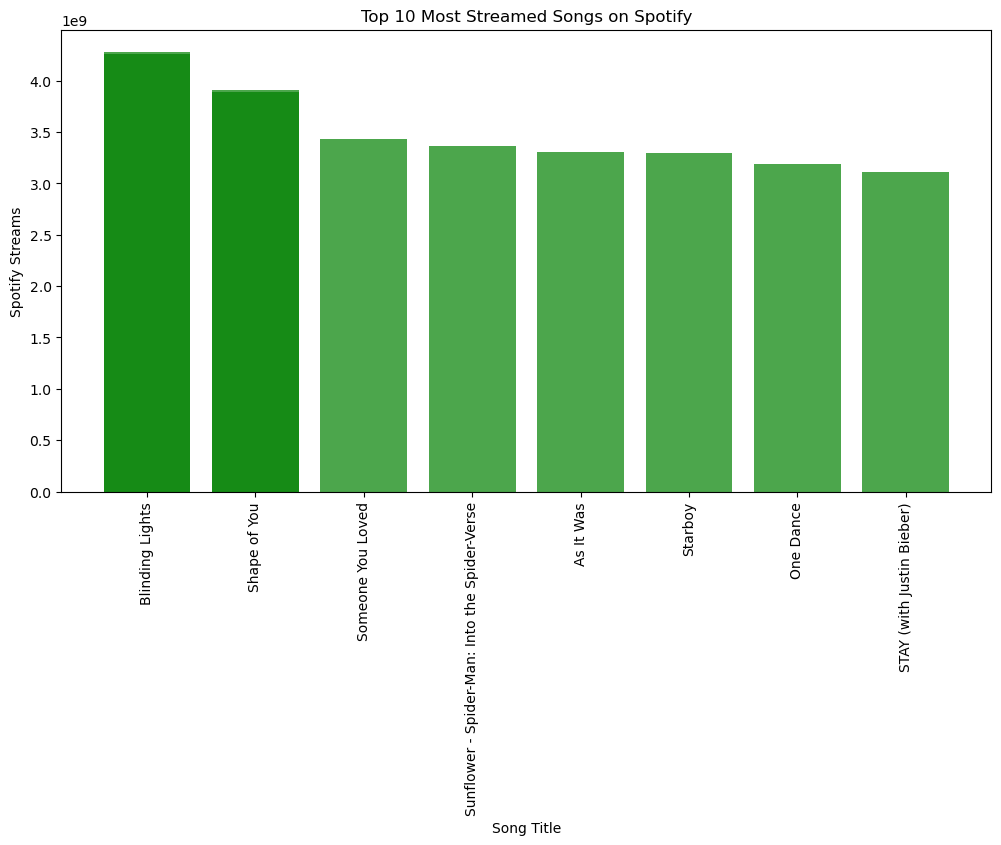

In [15]:
# Plot the top 10 songs by streams
plt.figure(figsize=(12,6))
plt.bar(top10Songs['Track'], top10Songs['Spotify Streams'], color='green', alpha=0.7)
plt.xticks(rotation=90)
plt.ylabel('Spotify Streams')
plt.xlabel('Song Title')
plt.title('Top 10 Most Streamed Songs on Spotify')
plt.show()

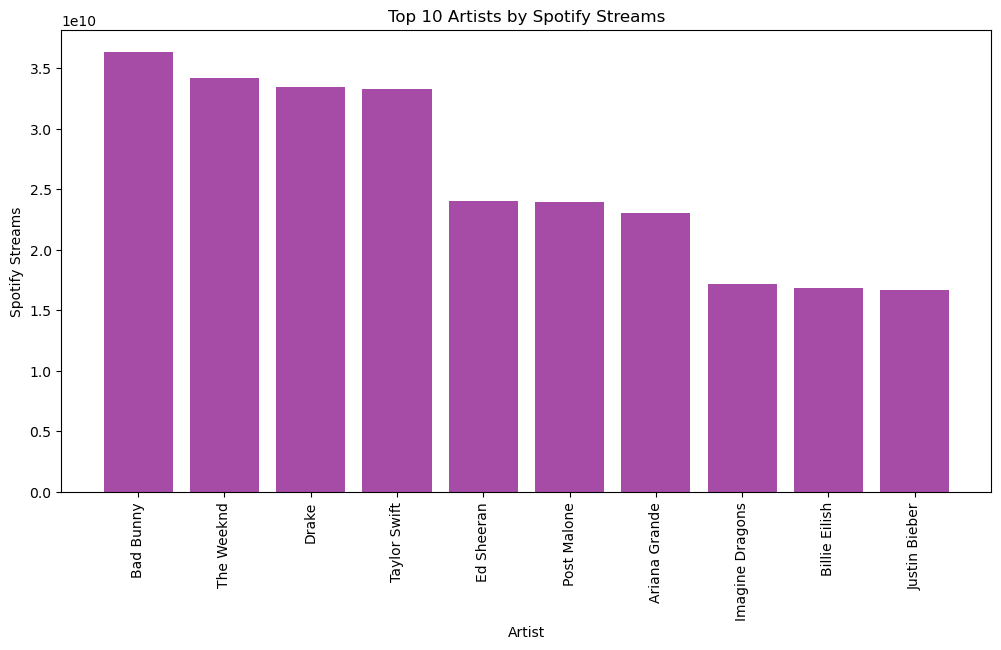

In [16]:
# Plot the top 10 artists by streams
plt.figure(figsize=(12,6))
plt.bar(top10Artists.index, top10Artists['Spotify Streams'], color='purple', alpha=0.7)
plt.xticks(rotation=90)
plt.ylabel('Spotify Streams')
plt.xlabel('Artist')
plt.title('Top 10 Artists by Spotify Streams')
plt.show()

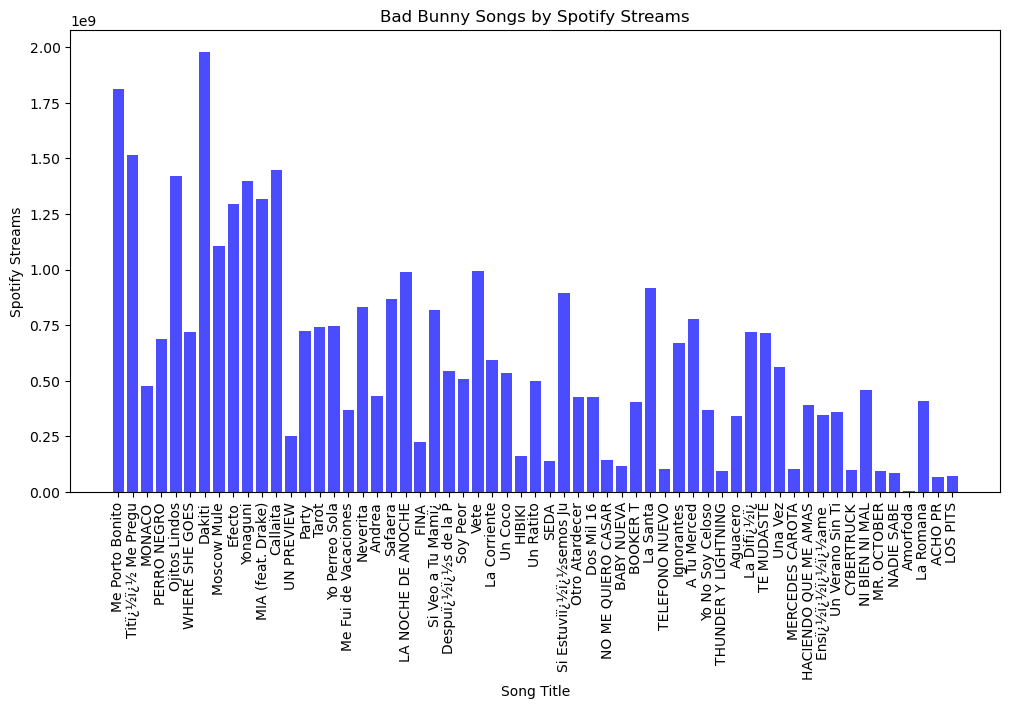

In [17]:
# Plot the top artist's songs by streams
plt.figure(figsize=(12,6))
plt.bar(topArtist['Track'], topArtist['Spotify Streams'], color='blue', alpha=0.7)
plt.xticks(rotation=90)
plt.ylabel('Spotify Streams')
plt.xlabel('Song Title')
plt.title(f'{topArtist.iloc[0,2]} Songs by Spotify Streams')
plt.show()

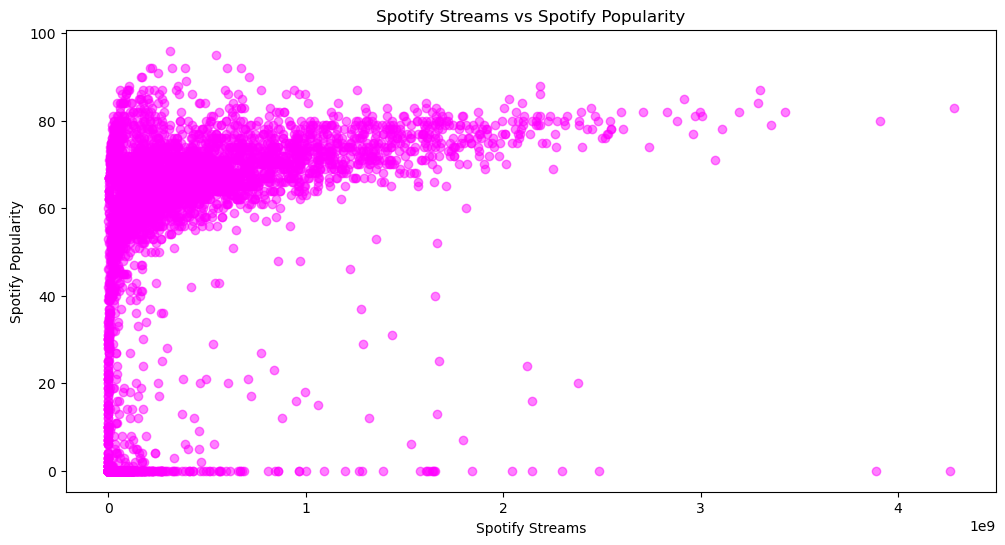

In [18]:
# Scatter plot of Spotify Streams vs Spotify Popularity
plt.figure(figsize=(12,6))
plt.scatter(songs['Spotify Streams'], songs['Spotify Popularity'], color='magenta', alpha=0.5)
plt.ylabel('Spotify Popularity')
plt.xlabel('Spotify Streams')
plt.title('Spotify Streams vs Spotify Popularity')
plt.show()

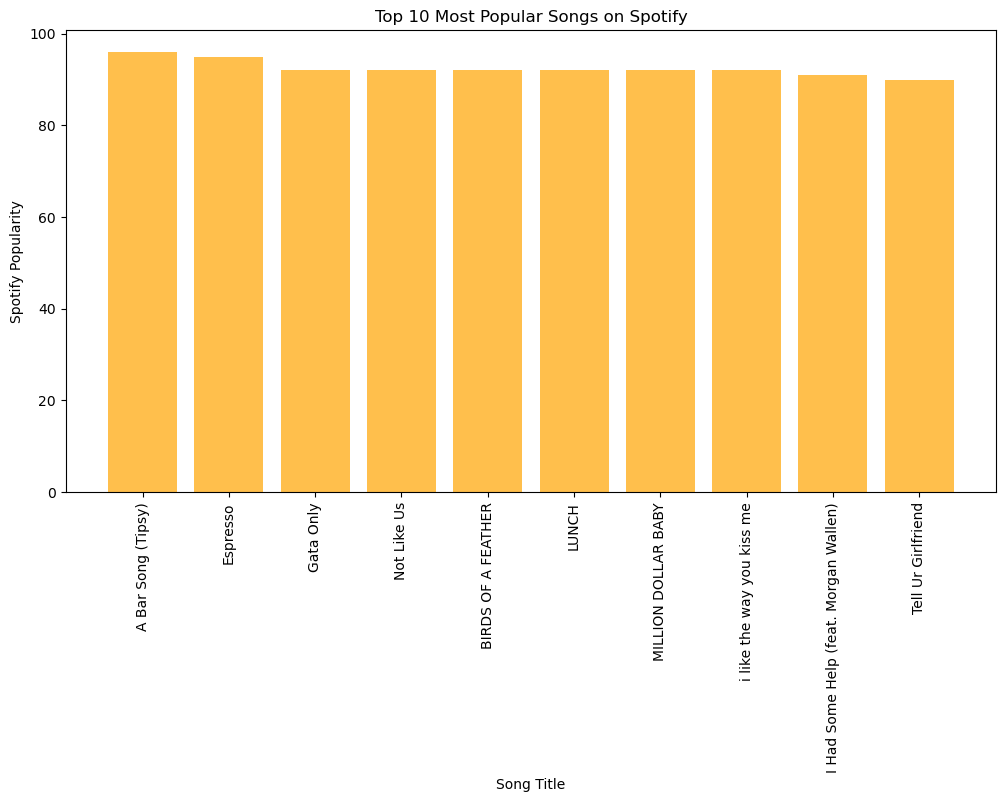

In [19]:
# Plot the top 10, most popular songs on Spotify
top10PopularSongs = songs.sort_values(by='Spotify Popularity', ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.bar(top10PopularSongs['Track'], top10PopularSongs['Spotify Popularity'], color='orange', alpha=0.7)
plt.xticks(rotation=90)
plt.ylabel('Spotify Popularity')
plt.xlabel('Song Title')
plt.title('Top 10 Most Popular Songs on Spotify')
plt.show()

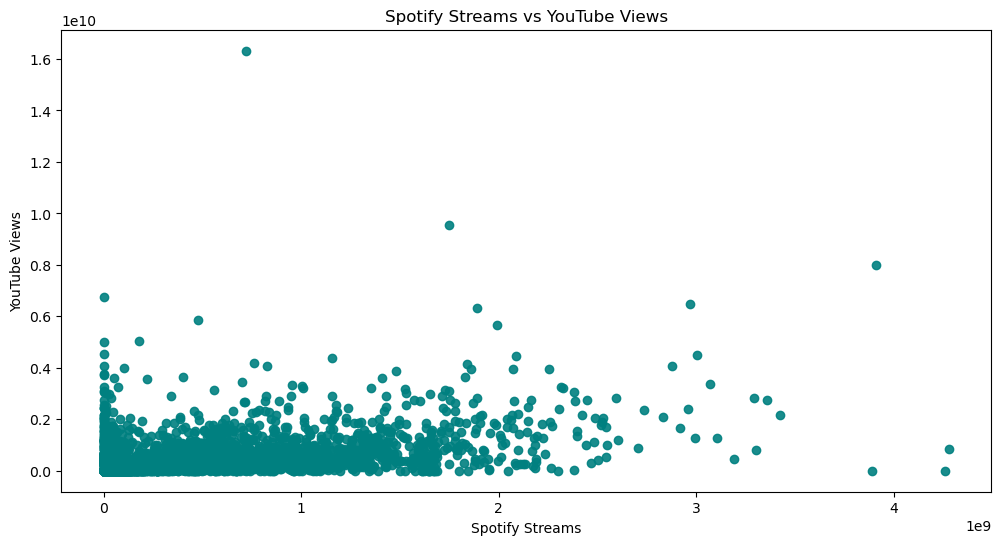

In [20]:
# Scatter plot of Spotify Streams vs YouTube Views
plt.figure(figsize=(12,6))
plt.scatter(songs['Spotify Streams'], songs['YouTube Views'], color='teal', alpha=0.9)
plt.ylabel('YouTube Views')
plt.xlabel('Spotify Streams')
plt.title('Spotify Streams vs YouTube Views')
plt.show()

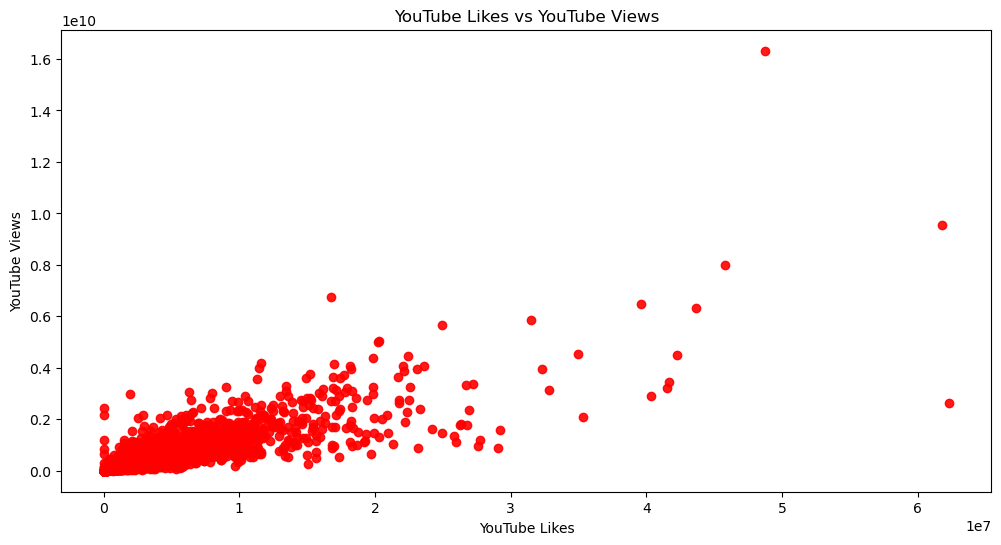

In [21]:
# Scatter YouTube Likes vs YouTube Views
plt.figure(figsize=(12,6))
plt.scatter(songs['YouTube Likes'], songs['YouTube Views'], color='red', alpha=0.9)
plt.ylabel('YouTube Views')
plt.xlabel('YouTube Likes')
plt.title('YouTube Likes vs YouTube Views')
plt.show()

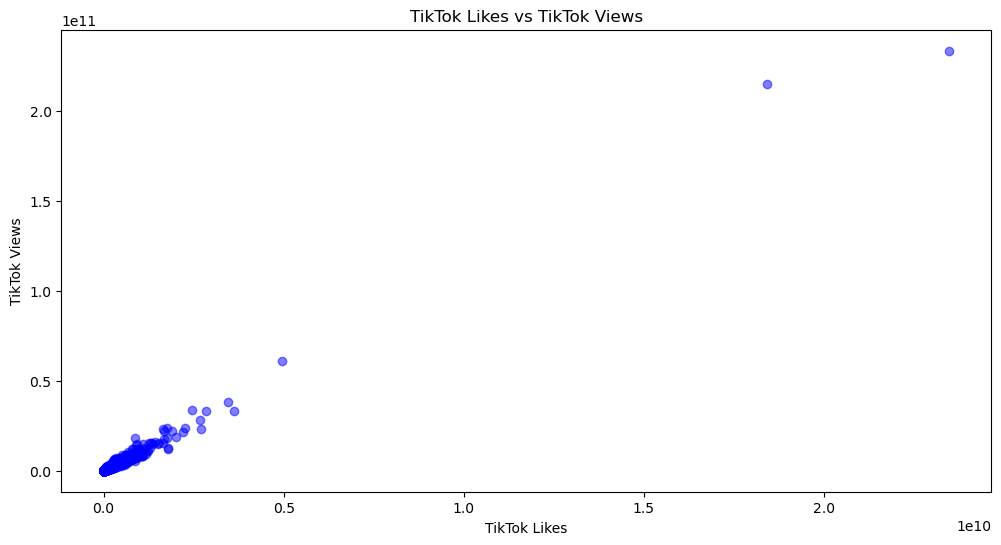

In [22]:
# Scatter TikTok Likes vs TikTok Views
plt.figure(figsize=(12,6))
plt.scatter(songs['TikTok Likes'], songs['TikTok Views'], color='blue', alpha=0.5)
plt.ylabel('TikTok Views')
plt.xlabel('TikTok Likes')
plt.title('TikTok Likes vs TikTok Views')
plt.show()

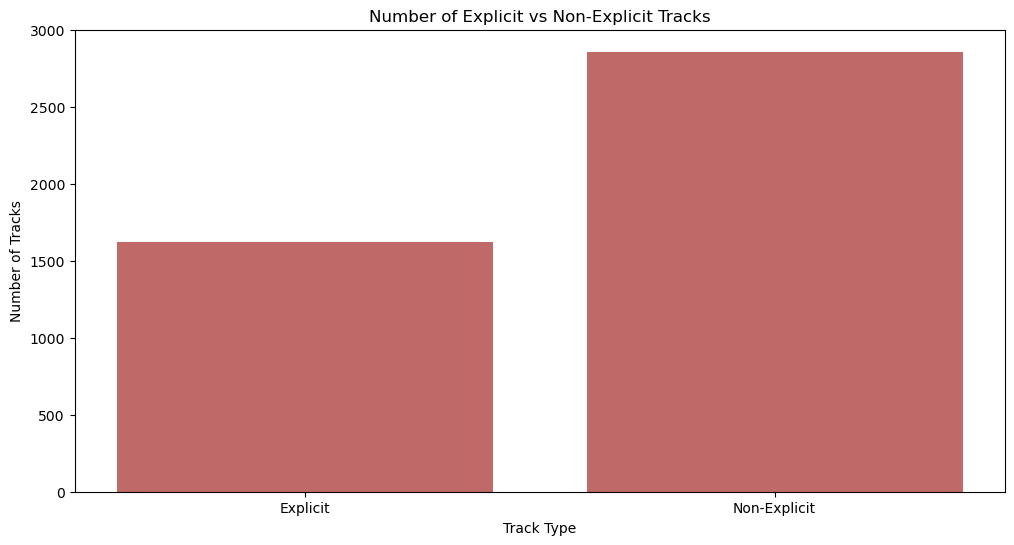

In [23]:
# Compare the number of explicit and non-explicit tracks
explicitTracks = songs[songs['Explicit Track'] == True]
nonExplicitTracks = songs[songs['Explicit Track'] == False]
plt.figure(figsize=(12,6))
plt.bar(['Explicit', 'Non-Explicit'], [len(explicitTracks), len(nonExplicitTracks)], color='brown', alpha=0.7)
plt.ylabel('Number of Tracks')
plt.xlabel('Track Type')
plt.title('Number of Explicit vs Non-Explicit Tracks')
plt.show()

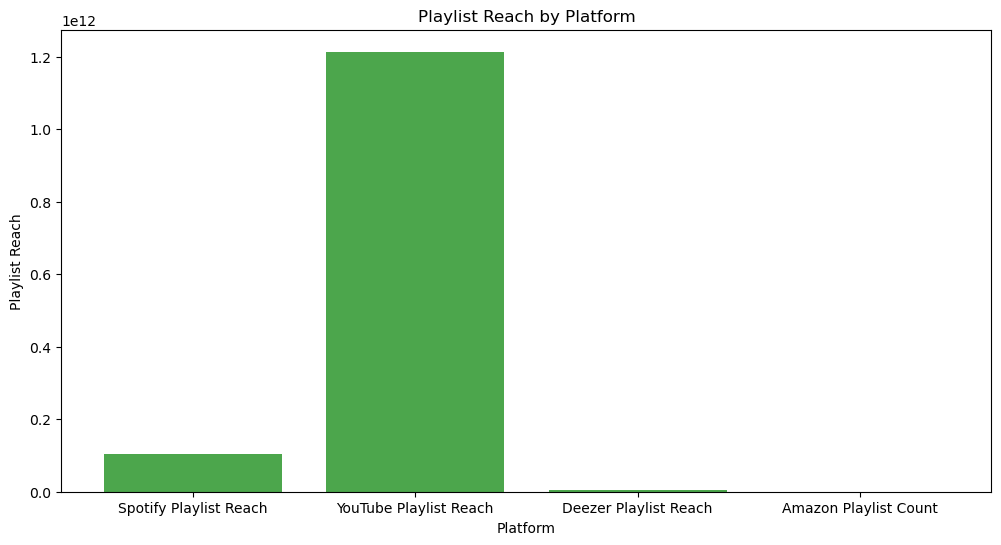

In [24]:
# Compare Playlists Reach by Platform
playlistReach = songs[['Spotify Playlist Reach', 'YouTube Playlist Reach', 'Deezer Playlist Reach', 'Amazon Playlist Count']]
playlistReach = playlistReach.sum()
plt.figure(figsize=(12,6))
plt.bar(playlistReach.index, playlistReach.values, color='green', alpha=0.7)
plt.ylabel('Playlist Reach')
plt.xlabel('Platform')
plt.title('Playlist Reach by Platform')
plt.show()

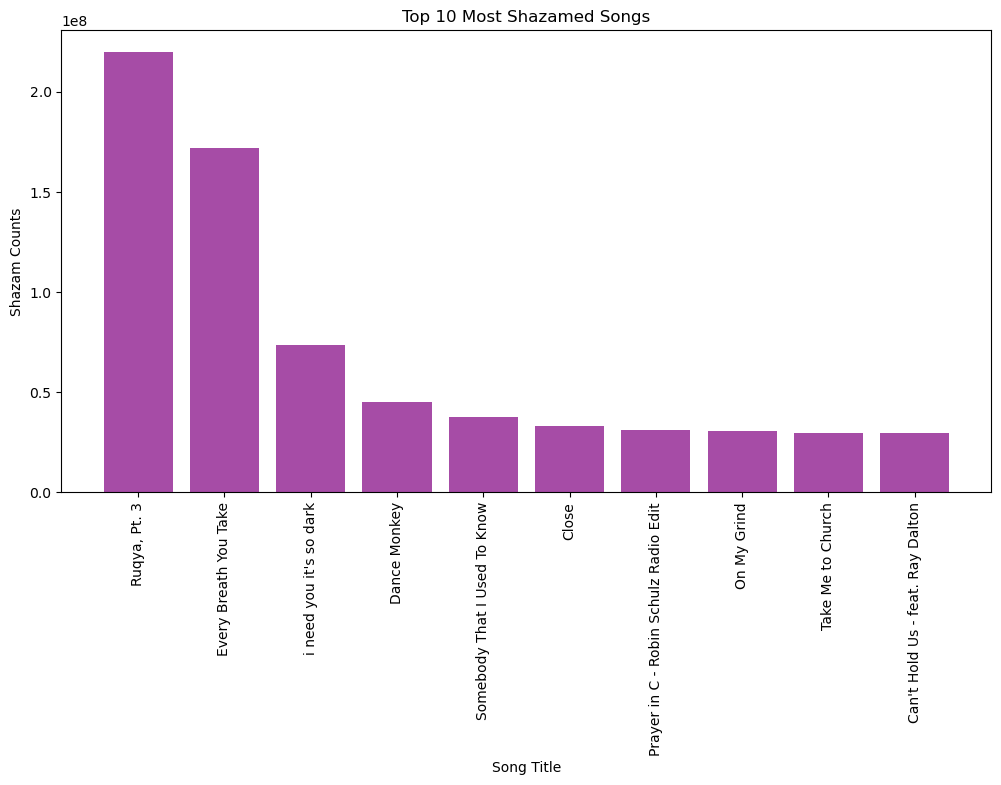

In [25]:
# Most recognized songs on Shazam
top10Shazam = songs.sort_values(by='Shazam Counts', ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.bar(top10Shazam['Track'], top10Shazam['Shazam Counts'], color='purple', alpha=0.7)
plt.xticks(rotation=90)
plt.ylabel('Shazam Counts')
plt.xlabel('Song Title')
plt.title('Top 10 Most Shazamed Songs')
plt.show()

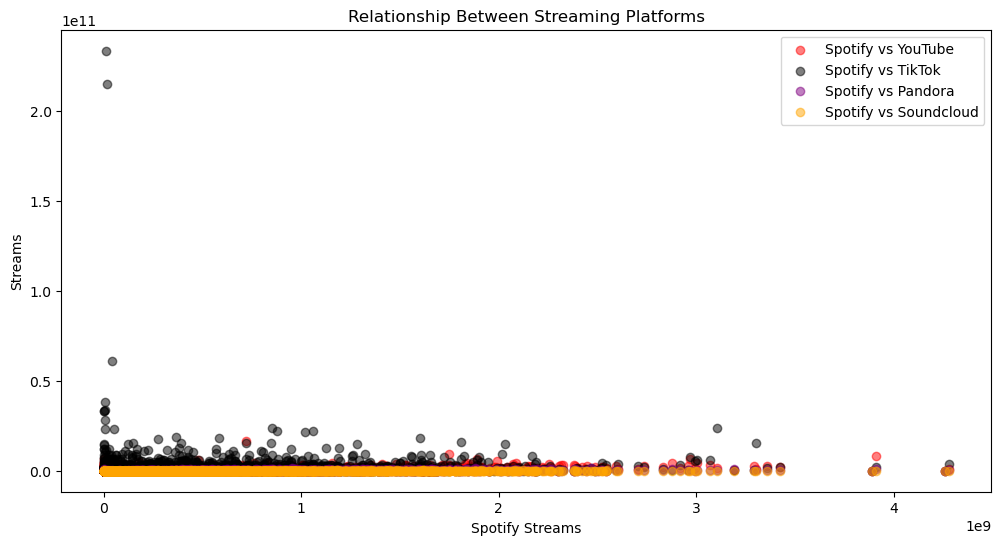

In [26]:
# Scatter plot showing the relationship between all streaming platforms
plt.figure(figsize=(12,6))
plt.scatter(songs['Spotify Streams'], songs['YouTube Views'], color='red', alpha=0.5, label='Spotify vs YouTube')
plt.scatter(songs['Spotify Streams'], songs['TikTok Views'], color='black', alpha=0.5, label='Spotify vs TikTok')
plt.scatter(songs['Spotify Streams'], songs['Pandora Streams'], color='purple', alpha=0.5, label='Spotify vs Pandora')
plt.scatter(songs['Spotify Streams'], songs['Soundcloud Streams'], color='orange', alpha=0.5, label='Spotify vs Soundcloud')
plt.ylabel('Streams')
plt.xlabel('Spotify Streams')
plt.title('Relationship Between Streaming Platforms')
plt.legend()
plt.show()

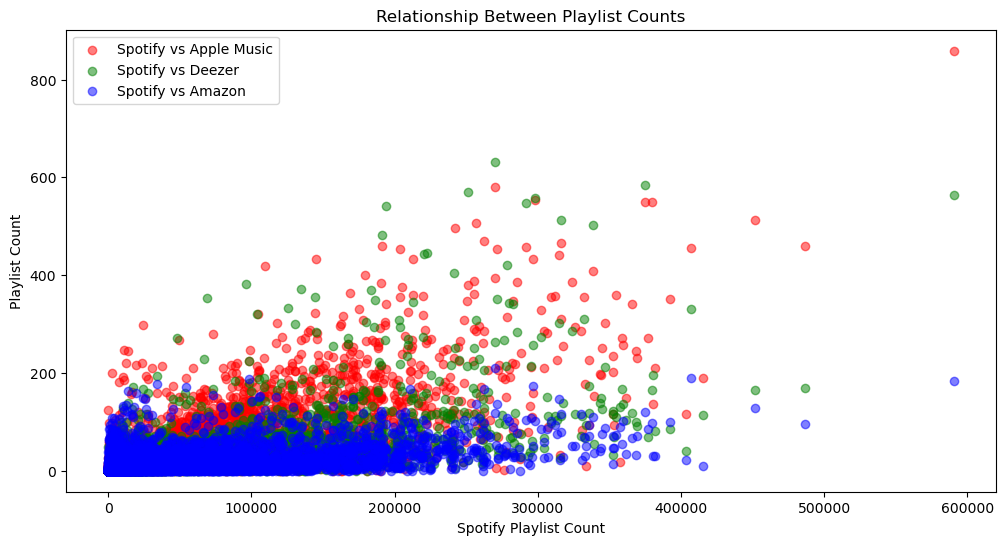

In [27]:
# Scatter plot showing the relationship between all playlist counts
plt.figure(figsize=(12,6))
plt.scatter(songs['Spotify Playlist Count'], songs['Apple Music Playlist Count'], color='red', alpha=0.5, label='Spotify vs Apple Music')
plt.scatter(songs['Spotify Playlist Count'], songs['Deezer Playlist Count'], color='green', alpha=0.5, label='Spotify vs Deezer')
plt.scatter(songs['Spotify Playlist Count'], songs['Amazon Playlist Count'], color='blue', alpha=0.5, label='Spotify vs Amazon')
plt.ylabel('Playlist Count')
plt.xlabel('Spotify Playlist Count')
plt.title('Relationship Between Playlist Counts')
plt.legend()
plt.show()

In [28]:
# Find songs by Taylor Swift
taylorSwiftSongs = songs[songs['Artist'] == 'Taylor Swift']

# Sort the songs by album
taylorSwiftSongs = taylorSwiftSongs.sort_values(by='Album Name')
taylorSwiftSongs

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
1836,Bad Blood,1989 (Deluxe),Taylor Swift,2014-01-01,USCJY1431369,1834,34.0,602316735,64462,20443761,...,12331,117,9,19067,8,442671630,511323,387051,3046517,False
3210,Style,1989 (Deluxe),Taylor Swift,2014-01-01,USCJY1431319,3179,24.4,1216966135,92577,30252887,...,18666,117,12,44098,2,388338220,136828,448643,6844702,False
464,Blank Space,1989 (Deluxe),Taylor Swift,2014-01-01,USCJY1431309,463,71.5,1829733410,157465,49558504,...,41483,123,107,566690,28,730704780,855164,749243,12259073,False
597,Shake It Off,1989 (Deluxe),Taylor Swift,2014-01-01,USCJY1431349,593,62.3,1409692678,162649,73697294,...,45933,520,115,2264405,81,131156870,751459,0,10197326,False
2780,Wildest Dreams,1989 (Deluxe),Taylor Swift,2014-01-01,USCJY1431379,2771,26.7,964058806,102916,33415141,...,5572,150,9,130475,6,450171421,240224,0,5306715,False
4492,Say Don't Go (Taylor's Version) (From The Vault),1989 (Taylor's Version),Taylor Swift,2023-10-26,USUG12306688,4463,19.7,176970541,12080,14949964,...,1260,0,4,16079,32,5334445,1775,0,116655,False
3010,Now That We Don't Talk (Taylor's Version) (Fro...,1989 (Taylor's Version),Taylor Swift,2023-10-26,USUG12306689,2999,25.4,269790122,15686,16083942,...,3068,100,2,16245,28,5065425,3774,0,194561,False
2991,Blank Space (Taylor's Version),1989 (Taylor's Version),Taylor Swift,2023-10-26,USUG12306673,2992,25.5,177731392,12908,25416651,...,18711,0,4,407207,48,8616929,4491,0,194854,False
2909,"""Slut!"" (Taylor's Version) (From The Vault)",1989 (Taylor's Version),Taylor Swift,2023-10-26,USUG12306687,2908,25.9,265932119,15133,21522387,...,6497,5,19,512287,33,2649309,1180,0,362874,False
1556,Style (Taylor's Version),1989 (Taylor's Version),Taylor Swift,2023-10-26,USUG12306674,1551,37.3,211462881,15136,20309268,...,13351,0,5,443013,42,8256756,4487,0,203500,False


In [29]:
# Find the ablums that aren't on this list
taylorSwiftAlbums = ["1989 (Deluxe)", "1989 (Taylor's Version)", "Fearless", "Fearless (Taylor's Version)", "Lover", 
                     "Red (Taylor's Version)", "reputation", "Speak Now (Taylor's Version)", "Midnights", "evermore", 
                     "folklore", "THE TORTURED POETS DEPARTMENT", "THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY"]

# Use .isin() to check if the album names are not in the excluded list
incorrectAlbumNames = ~taylorSwiftSongs['Album Name'].isin(taylorSwiftAlbums)

# Display the albums that aren't on the list
taylorSwiftSongs[incorrectAlbumNames]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
2815,I Knew You Were Trouble.,I Knew You Were Trouble.,Taylor Swift,2012-01-01,USCJY1231039,2809,26.5,839642356,110606,35486997,...,3816,42,18,105709,19,653492761,731107,836565,9583929,False
880,Look What You Made Me Do,Look What You Made Me Do,Taylor Swift,2017-08-24,USCJY1750000,876,51.6,1152346128,93178,62880711,...,11382,113,43,239444,35,149366824,295550,0,5102278,False
2378,Love Story (Taylorï¿½ï¿½ï¿½s Ve,Love Story (Taylorï¿½ï¿½ï¿½s Ve,Taylor Swift,2021-02-12,USUG12100342,2363,29.3,763292840,71179,60479422,...,55204,0,28,455783,7,59534342,31885,3371115,1405713,False
3610,ME! (feat. Brendon Urie of Panic! At The Disco),ME!,Taylor Swift,2019-04-26,USUG11901267,3588,22.7,859985881,17061,4818145,...,56082,0,27,51446,7,109321182,155826,0,2764962,False
3197,We Are Never Ever Getting Back Together,We Are Never Ever Getting Back Together,Taylor Swift,2012-01-01,USCJY1231018,3197,24.4,669895431,82898,30660565,...,29308,290,26,262279,38,396481900,660092,0,4565091,False
3571,Wildest Dreams (Taylor's Version),Wildest Dreams (Taylor's Version),Taylor Swift,2021-09-17,USUG12103658,3550,22.8,732118596,62990,35314187,...,24287,0,11,293175,59,47562205,14217,0,982971,False
2128,You Need To Calm Down,You Need To Calm Down,Taylor Swift,2019-06-14,USUG11901470,2113,31.3,935098853,63937,44356528,...,70122,379,39,1053627,59,181933830,170370,532187,2751022,False


In [30]:
# Correct the album names
taylorSwiftSongs.loc[taylorSwiftSongs['Album Name'] == 'I Knew You Were Trouble.', 'Album Name'] = "Red"
taylorSwiftSongs.loc[taylorSwiftSongs['Album Name'] == 'Look What You Made Me Do', 'Album Name'] = "reputation"
taylorSwiftSongs.loc[taylorSwiftSongs['Album Name'] == 'Love Story (Taylorï¿½ï¿½ï¿½s Ve', 'Album Name'] = "Fearless (Taylor's Version)"
taylorSwiftSongs.loc[taylorSwiftSongs['Album Name'] == 'ME!', 'Album Name'] = "Lover"
taylorSwiftSongs.loc[taylorSwiftSongs['Album Name'] == 'We Are Never Ever Getting Back Together', 'Album Name'] = "Red"
taylorSwiftSongs.loc[taylorSwiftSongs['Album Name'] == "Wildest Dreams (Taylor's Version)", 'Album Name'] = "1989 (Taylor's Version)"
taylorSwiftSongs.loc[taylorSwiftSongs['Album Name'] == 'You Belong With Me', 'Album Name'] = "Fearless"
taylorSwiftSongs.loc[taylorSwiftSongs['Album Name'] == 'You Need To Calm Down', 'Album Name'] = "Lover"


In [31]:
# Display the corrected album names
taylorSwiftSongs

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
1836,Bad Blood,1989 (Deluxe),Taylor Swift,2014-01-01,USCJY1431369,1834,34.0,602316735,64462,20443761,...,12331,117,9,19067,8,442671630,511323,387051,3046517,False
3210,Style,1989 (Deluxe),Taylor Swift,2014-01-01,USCJY1431319,3179,24.4,1216966135,92577,30252887,...,18666,117,12,44098,2,388338220,136828,448643,6844702,False
464,Blank Space,1989 (Deluxe),Taylor Swift,2014-01-01,USCJY1431309,463,71.5,1829733410,157465,49558504,...,41483,123,107,566690,28,730704780,855164,749243,12259073,False
597,Shake It Off,1989 (Deluxe),Taylor Swift,2014-01-01,USCJY1431349,593,62.3,1409692678,162649,73697294,...,45933,520,115,2264405,81,131156870,751459,0,10197326,False
2780,Wildest Dreams,1989 (Deluxe),Taylor Swift,2014-01-01,USCJY1431379,2771,26.7,964058806,102916,33415141,...,5572,150,9,130475,6,450171421,240224,0,5306715,False
4492,Say Don't Go (Taylor's Version) (From The Vault),1989 (Taylor's Version),Taylor Swift,2023-10-26,USUG12306688,4463,19.7,176970541,12080,14949964,...,1260,0,4,16079,32,5334445,1775,0,116655,False
3010,Now That We Don't Talk (Taylor's Version) (Fro...,1989 (Taylor's Version),Taylor Swift,2023-10-26,USUG12306689,2999,25.4,269790122,15686,16083942,...,3068,100,2,16245,28,5065425,3774,0,194561,False
2991,Blank Space (Taylor's Version),1989 (Taylor's Version),Taylor Swift,2023-10-26,USUG12306673,2992,25.5,177731392,12908,25416651,...,18711,0,4,407207,48,8616929,4491,0,194854,False
2909,"""Slut!"" (Taylor's Version) (From The Vault)",1989 (Taylor's Version),Taylor Swift,2023-10-26,USUG12306687,2908,25.9,265932119,15133,21522387,...,6497,5,19,512287,33,2649309,1180,0,362874,False
1556,Style (Taylor's Version),1989 (Taylor's Version),Taylor Swift,2023-10-26,USUG12306674,1551,37.3,211462881,15136,20309268,...,13351,0,5,443013,42,8256756,4487,0,203500,False


In [32]:
# Correct track name
taylorSwiftSongs.loc[taylorSwiftSongs['Track'] == 'I Knew You Were Trouble.', 'Track'] = "I Knew You Were Trouble"
taylorSwiftSongs.loc[taylorSwiftSongs['Track'] == 'Love Story (Taylorï¿½ï¿½ï¿½s Ve', 'Track'] = "Love Story (Taylor's Version)"

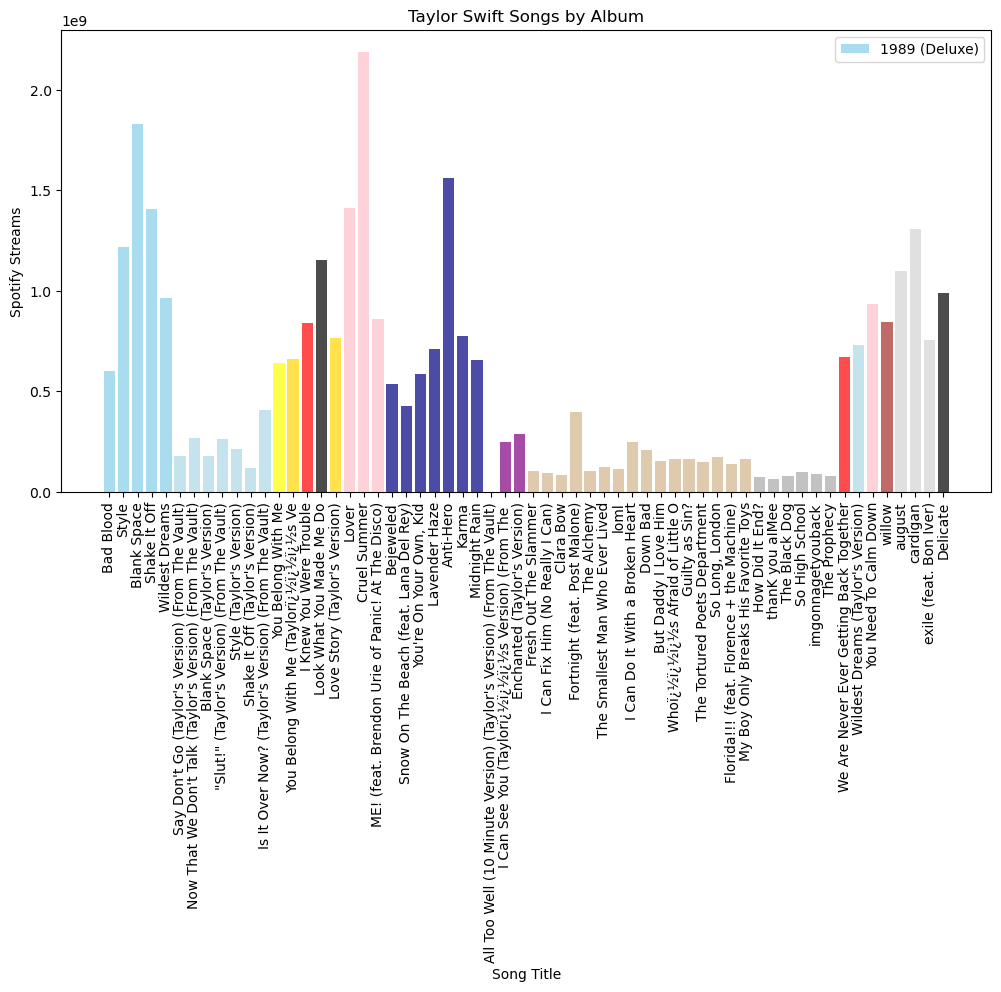

In [33]:
# Create variables for the albums by color
albumColors = {'1989 (Deluxe)': 'skyblue', "1989 (Taylor's Version)": 'lightblue', 'Fearless': 'yellow', 
               "Fearless (Taylor's Version)": 'gold', 'Lover': 'pink', "Red": 'red', 
               "reputation": 'black', "Speak Now (Taylor's Version)": 'purple', "Midnights": 'navy', 
               "evermore": 'brown', "folklore": 'lightgray', "THE TORTURED POETS DEPARTMENT": 'tan',
               "THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY": 'darkgray'}

# Map album names to colors
colors =  taylorSwiftSongs['Album Name'].map(albumColors).fillna('white')

# Plot the songs by album
plt.figure(figsize=(12,6))
plt.bar(taylorSwiftSongs['Track'], taylorSwiftSongs['Spotify Streams'], color=colors, alpha=0.7)
plt.xticks(rotation=90)
plt.ylabel('Spotify Streams')
plt.xlabel('Song Title')
plt.title('Taylor Swift Songs by Album')
plt.legend(albumColors)
plt.show()

In [34]:
# Save the cleaned data to a new CSV file
songs.to_csv('data/Most_Streamed_Spotify_Songs_Cleaned.csv', index=False)